In [1]:
import pandas as pd
import json
import os
from matplotlib import pyplot as plt
import re
import math
import numpy as np
from nltk.corpus import stopwords 
from collections import Counter
from wordcloud import WordCloud
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import Phrases
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
pd.options.mode.chained_assignment = None  # default='warn'

[nltk_data] Downloading package punkt to C:\Users\Cat
[nltk_data]     Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Cat
[nltk_data]     Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
video = "Mathais Postings dump-21 Apr 2020.csv"
file_name = os.path.splitext(video)[0]
df = pd.read_csv(video)

df

,Type,PageID,PageURL,PageName,StudyGroup,MessageParentID,MessageID,EntryDate,UserName,Comment,ImageURL
0,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6895,2019-08-14 15:41:00pm EDT,ChFranske,The step most illuminating to was the look at ...,Not implemented
1,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6898,2019-08-14 15:42:30pm EDT,NaSutton,Focusing on productive talk was helpful becaus...,Not implemented
2,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6899,2019-08-14 15:42:58pm EDT,GeGarrett,Focusing on each of the three angles helped me...,Not implemented
3,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6900,2019-08-14 15:43:05pm EDT,RoStainton,All the steps were really illuminating. The fi...,Not implemented
4,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6901,2019-08-14 15:43:27pm EDT,AmJenkyn,Productive talk showed me that all of the stud...,Not implemented
...,...,...,...,...,...,...,...,...,...,...,...
302,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10297,2020-02-26 14:13:41pm EST,JeTwardowski,I think some thought Mathais wasn&#039;t sure ...,Not implemented
303,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10298,2020-02-26 14:14:07pm EST,LaRockwood,Focusing on the productive talk in general was...,Not implemented
304,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10300,2020-02-26 14:15:30pm EST,RaAlderman,I think it is important to Take time to allow ...,Not implemented
305,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10301,2020-02-26 14:16:02pm EST,TaPinkney,Mathias knew what he was talking about; howeve...,Not implemented


In [3]:
#using regular expression to clean up gestures [say-hi],[pause] and OV's and the like
stop_words = set(stopwords.words('english')) #set of common words eg and the in at etc
stops = ["um","uh","ah", "n't","\\", "<br \/><br \/>","&#039;","039","al","quot"]
df = df.fillna(0)
df = df.loc[df.Comment!= 0]
cleaned_text= []

for index,row in df.iterrows():
    text=re.sub(r"OV:|\[.*\]|\(|\)|-{1,}|\\|<br \/><br \/>|039|&#039", " ", row["Comment"])
    tokens=word_tokenize(text)
    tokens = [w.lower() for w in tokens if w.lower() not in stop_words and w.lower() not in stops]
    tokens =[w for w in tokens if re.match(r"\w+", w)]
    cleaned_text.append(tokens)
    
df["tokens"] = cleaned_text
df = df.loc[(textlist != [] for textlist in df["tokens"])]

#create bigrams
tokens_list=df.groupby(by="Comment").tokens.first() #check for duplicate texts
bigram = Phrases(tokens_list, min_count=2)

bigrams=[bigram[d] for d in df["tokens"]]
df["bigrams"]=bigrams
df

,Type,PageID,PageURL,PageName,StudyGroup,MessageParentID,MessageID,EntryDate,UserName,Comment,ImageURL,tokens,bigrams
0,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6895,2019-08-14 15:41:00pm EDT,ChFranske,The step most illuminating to was the look at ...,Not implemented,"[step, illuminating, look, science, practices,...","[step_illuminating, look, science_practices, u..."
1,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6898,2019-08-14 15:42:30pm EDT,NaSutton,Focusing on productive talk was helpful becaus...,Not implemented,"[focusing, productive, talk, helpful, showed, ...","[focusing_productive, talk, helpful, showed, m..."
2,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6899,2019-08-14 15:42:58pm EDT,GeGarrett,Focusing on each of the three angles helped me...,Not implemented,"[focusing, three, angles, helped, understand, ...","[focusing, three, angles, helped, understand, ..."
3,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6900,2019-08-14 15:43:05pm EDT,RoStainton,All the steps were really illuminating. The fi...,Not implemented,"[steps, really, illuminating, first, showed, g...","[steps, really, illuminating, first, showed, g..."
4,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,20129 VT VINS Cohort 2,0,6901,2019-08-14 15:43:27pm EDT,AmJenkyn,Productive talk showed me that all of the stud...,Not implemented,"[productive, talk, showed, students, engaged, ...","[productive_talk, showed, students, engaged, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10297,2020-02-26 14:13:41pm EST,JeTwardowski,I think some thought Mathais wasn&#039;t sure ...,Not implemented,"[think, thought, mathais, sure, knew, talking,...","[think, thought, mathais, sure, knew_talking, ..."
303,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10298,2020-02-26 14:14:07pm EST,LaRockwood,Focusing on the productive talk in general was...,Not implemented,"[focusing, productive, talk, general, illumina...","[focusing_productive, talk_general, illuminati..."
304,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10300,2020-02-26 14:15:30pm EST,RaAlderman,I think it is important to Take time to allow ...,Not implemented,"[think, important, take, time, allow, students...","[think, important, take_time, allow, students,..."
305,COMMENT,1284,/intro-3dl-21/unit-4/step-06-analyzing-science...,Step 6: Analyzing a Fourth Grade Science Discu...,21204 DE DOE Cohort 2,0,10301,2020-02-26 14:16:02pm EST,TaPinkney,Mathias knew what he was talking about; howeve...,Not implemented,"[mathias, knew, talking, however, difficulty, ...","[mathias, knew_talking, however, difficulty, a..."


Directory already exists Mathais Postings dump-21 Apr 2020


KeyboardInterrupt: 

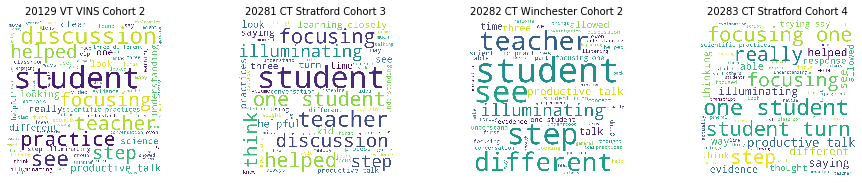

In [4]:
#picture for top words
result_path = file_name

try:
    os.mkdir(result_path)
except OSError:
    print ("Directory already exists %s" % result_path)
else:
    print ("Successfully created the directory %s " % result_path)
    
group = df.groupby(by = "StudyGroup")
studygroups = list(group.groups.keys())
# subset_groups = studygroups[0:5]
n_rows = len(studygroups)/5
i = 1
plt.figure(figsize = (20,20), facecolor = None) 

for studygroup in studygroups:
    temp = group.groups[studygroup].tolist()
    part_df = df.loc[temp]
    words=[]
    for word in part_df["tokens"]:
        words.extend(word)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 20).generate(" ".join(words)) 
    plt.subplot(n_rows+1, 5, i)
    plt.imshow(wordcloud) 
    plt.title(studygroup, fontsize = 10)
    plt.axis("off") 
    i+= 1

plt.savefig(result_path+"/mathais_allcohorts.png")

In [6]:
group = df.groupby(by = "StudyGroup")
studygroups = list(group.groups.keys())
n_perrow = 3
nrow_perimg = 3 
total_perfile = n_perrow * nrow_perimg
slice_id = [total_perfile for i in range(0,math.floor(len(studygroups)/total_perfile))]
slice_id.append(len(studygroups)%total_perfile)
subset_groups = []
start, end = 0, 0
for slice_len in slice_id:
    end = end+slice_len
    subset_groups.append(studygroups[start:end])
    start = end

plt.figure(figsize = (25,25), facecolor = None)
for subset in subset_groups:
    i = 1
    for studygroup in subset:
        print(studygroup)
        temp = group.groups[studygroup].tolist()
        part_df = df.loc[temp]
        words=[]
        for word in part_df["tokens"]:
            words.extend(word)

        wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 20).generate(" ".join(words)) 
        plt.subplot(nrow_perimg, n_perrow, i)
        plt.imshow(wordcloud) 
        plt.title(studygroup, fontsize = 16)
        plt.axis("off") 
        i+= 1
    save_name = "/mathais_subcohort"+str(subset_groups.index(subset)+1)+".png"
    plt.savefig(result_path+save_name)
    plt.clf()


20129 VT VINS Cohort 2
20281 CT Stratford Cohort 3
20282 CT Winchester Cohort 2
20283 CT Stratford Cohort 4
205317 MI AAPS Cohort 9
205319 MI Macomb Cohort 32
205321 MI Lake Orion Cohort 5
205324 MI Macomb Cohort 33
205334 MI Farmington Cohort 10
205336 MI Macomb Cohort 35
205338 MI Wayne RESA Cohort 34
205340 MI Lamphere Cohort 1
205341 MI BCAMSC Cohort 5
205343 MI Macomb Cohort 36
205348 MI OAISD Cohort 5
20604 MA BHRSD Cohort 1
20818 NH Pinkerton Academy Cohort 1
20819 NH Bedford Cohort 2
20820 NH Nashua Cohort 1
20822 NH SAU 15 Cohort 3
20823 NH NHSTA Bow Cohort 2
20827 NH Bedford Cohort 3
20910 RI Times2 Institute Cohort 5
20911 RI Reledlearning Cohort 1
21004 NJ NJSTA Simmons Cohort 1
21005 NJ Cherry Hill Cohort 3
21201 DE Dover Cohort 1
21203 DE DOE Cohort 2
21204 DE DOE Cohort 2


<Figure size 1800x1800 with 0 Axes>

In [ ]:
#automatically detect groups of words - "Topic"

dictionary = Dictionary(df["bigrams"])
corpus=[dictionary.doc2bow(bigramlist) for bigramlist in df["bigrams"]]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=6) 

#create list of words in each topic
big_topic_list = lda_model.show_topics(formatted = False)
big_topic_terms = []

for tup in big_topic_list:
    terms = [liltup[0] for liltup in tup[1]]
    big_topic_terms.append(terms)
    
#find most probable topic associated with each text

topic_prob = []
topic_list = []
topic_terms = []
for d in df["bigrams"]:
    bow = dictionary.doc2bow(d)
    topic_distribution = lda_model.get_document_topics(bow)
    topic=sorted(topic_distribution, key=lambda x:x[1], reverse=True)[0]
    topic_list.append(topic[0])
    topic_prob.append(topic[1])
    topic_terms.append(big_topic_terms[topic[0]])
df["most_probable_topic"]=topic_list
df["topic_terms"] = topic_terms
df["topic_probability"]=topic_prob
cols = [0,1,2,5,6,10,11]
df.drop(df.columns[cols],axis=1,inplace=True)
df.to_csv(result_path+"/"+file_name+"_LDA.csv",index=False)
df
